In [1]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall:

In [2]:
import yaml

data_yaml = {
    'train': '/kaggle/input/driver-car/datacar/train/images',
    'val': '/kaggle/input/driver-car/datacar/valid/images',
    'test': '/kaggle/input/driver-car/datacar/test/images',
    'nc': 12,
    'names': [
        "Safe Driving",
        "Texting",
        "Talking on the phone",
        "Operating the Radio",
        "Drinking",
        "Reaching Behind",
        "Hair and Makeup",
        "Talking to Passenger",
        "Eyes Closed",
        "Yawning",
        "Nodding Off",
        "Eyes Open"
    ]
}

with open("data.yaml", "w") as f:
    yaml.dump(data_yaml, f, default_flow_style=False)


Đang phân tích 6860 file nhãn...


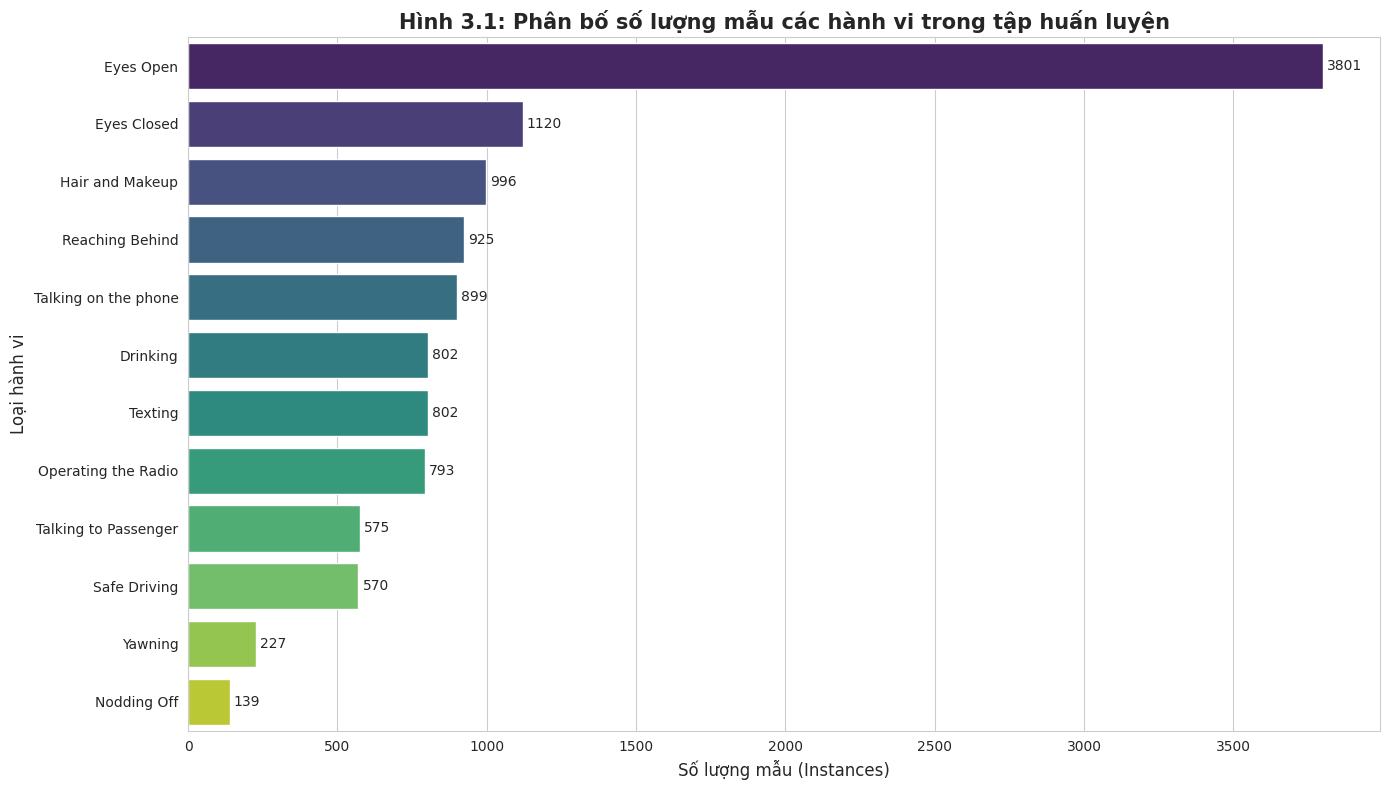

Đã lưu biểu đồ 'Hinh3_1_Phan_bo_du_lieu.png'


In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CẤU HÌNH ĐƯỜNG DẪN ---
# Hãy đảm bảo đường dẫn này đúng với nơi chứa dữ liệu của bạn
TRAIN_LABELS_PATH = '/kaggle/input/driver-car/datacar/train/labels'

# Danh sách tên lớp
CLASS_NAMES = [
    "Safe Driving", "Texting", "Talking on the phone", "Operating the Radio",
    "Drinking", "Reaching Behind", "Hair and Makeup", "Talking to Passenger",
    "Eyes Closed", "Yawning", "Nodding Off", "Eyes Open"
]

def plot_data_distribution(labels_path, class_names):
    # 1. Đếm số lượng từng lớp
    class_counts = {name: 0 for name in class_names}
    
    # Kiểm tra xem đường dẫn có tồn tại không trước khi quét
    if not os.path.exists(labels_path):
        print(f"Lỗi: Không tìm thấy thư mục tại {labels_path}")
        return

    txt_files = glob.glob(os.path.join(labels_path, "*.txt"))
    
    if not txt_files:
        print("Cảnh báo: Không tìm thấy file .txt nào trong thư mục nhãn!")
        return
        
    print(f"Đang phân tích {len(txt_files)} file nhãn...")
    
    for file in txt_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                try:
                    class_id = int(line.strip().split()[0])
                    if 0 <= class_id < len(class_names):
                        class_counts[class_names[class_id]] += 1
                except (IndexError, ValueError):
                    continue
    
    # 2. Tạo DataFrame và vẽ biểu đồ
    df = pd.DataFrame(list(class_counts.items()), columns=['Hành vi', 'Số lượng'])
    df = df.sort_values('Số lượng', ascending=False)
    
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")
    
    # --- ĐOẠN SỬA LỖI ---
    # Bỏ tham số legend=False, dùng dodge=False để các thanh không bị lệch
    ax = sns.barplot(x='Số lượng', y='Hành vi', data=df, palette='viridis', hue='Hành vi', dodge=False)
    
    # Tắt chú thích (legend) thủ công để tránh lỗi trên các phiên bản cũ
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    
    # Thêm số liệu cụ thể lên cột
    for i in ax.containers:
        ax.bar_label(i, padding=3, fontsize=10)
        
    plt.title('Hình 3.1: Phân bố số lượng mẫu các hành vi trong tập huấn luyện', fontsize=15, fontweight='bold')
    plt.xlabel('Số lượng mẫu (Instances)', fontsize=12)
    plt.ylabel('Loại hành vi', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('Hinh3_1_Phan_bo_du_lieu.png', dpi=300)
    plt.show()
    print("Đã lưu biểu đồ 'Hinh3_1_Phan_bo_du_lieu.png'")

# Chạy hàm
if os.path.exists(TRAIN_LABELS_PATH):
    plot_data_distribution(TRAIN_LABELS_PATH, CLASS_NAMES)
else:
    print(f"Lỗi: Đường dẫn không tồn tại: {TRAIN_LABELS_PATH}")

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolo11l.pt")  

In [6]:
# Huấn luyện trên dataset đã chuẩn bị
results = model.train(
    data="data.yaml",
    epochs=15,
    imgsz=640,
    batch=16,
    patience=20,
    optimizer="SGD",
    lr0=0.01,
    weight_decay=0.0005
)



Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True,

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1000       1711      0.951      0.963      0.972      0.763
          Safe Driving         93         93      0.942          1      0.993      0.909
               Texting        196        196      0.999      0.995      0.995      0.864
  Talking on the phone         98         98      0.995          1      0.995      0.783
   Operating the Radio        195        195      0.996          1      0.995      0.928
              Drinking        197        197      0.996      0.995      0.995      0.881
       Reaching Behind         86         86      0.994          1      0.995      0.857
  Talking to Passenger          9          9      0.885      0.889      0.883       0.69
           Eyes Closed        204        204      0.871      0.804      0.896      0.533
               Yawning         53         53      0.981      0.953      0.987      0.624
           Nodding Off         44         44      0.926          1      0.992      0.724
             Eyes Ope

Ma trận nhầm lẫn (Confusion Matrix):


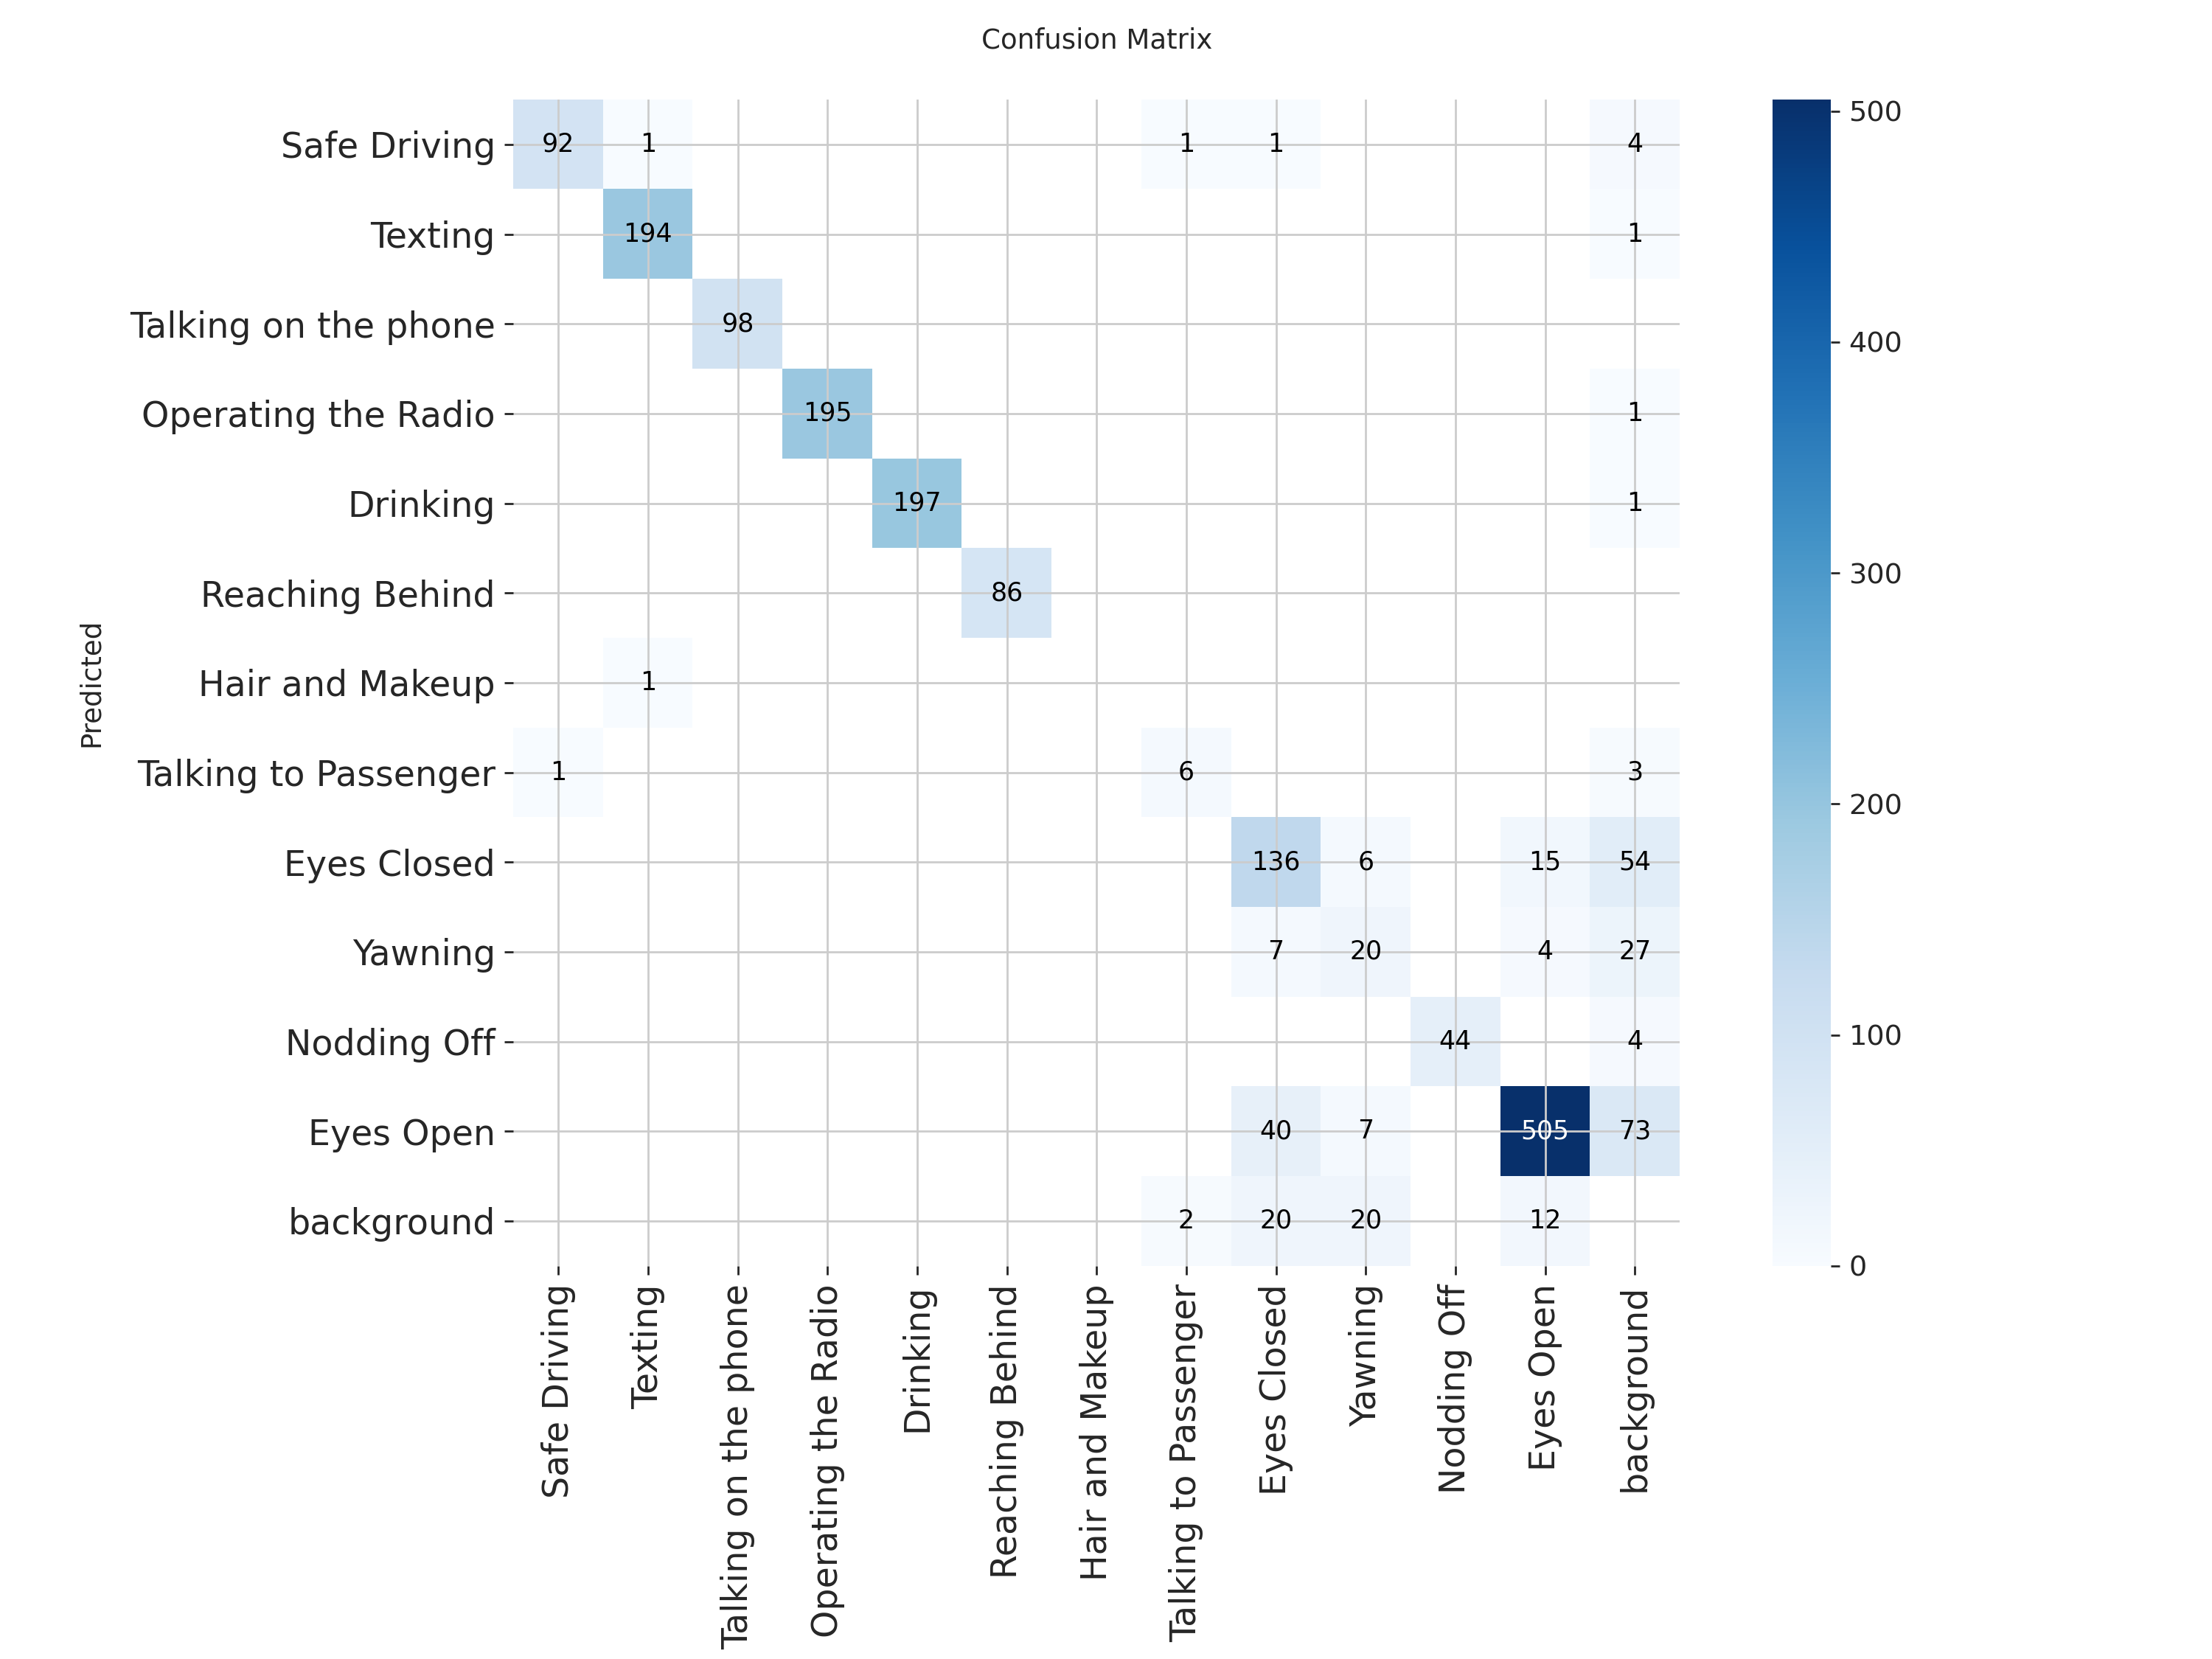


Biểu đồ kết quả huấn luyện (Loss & mAP):


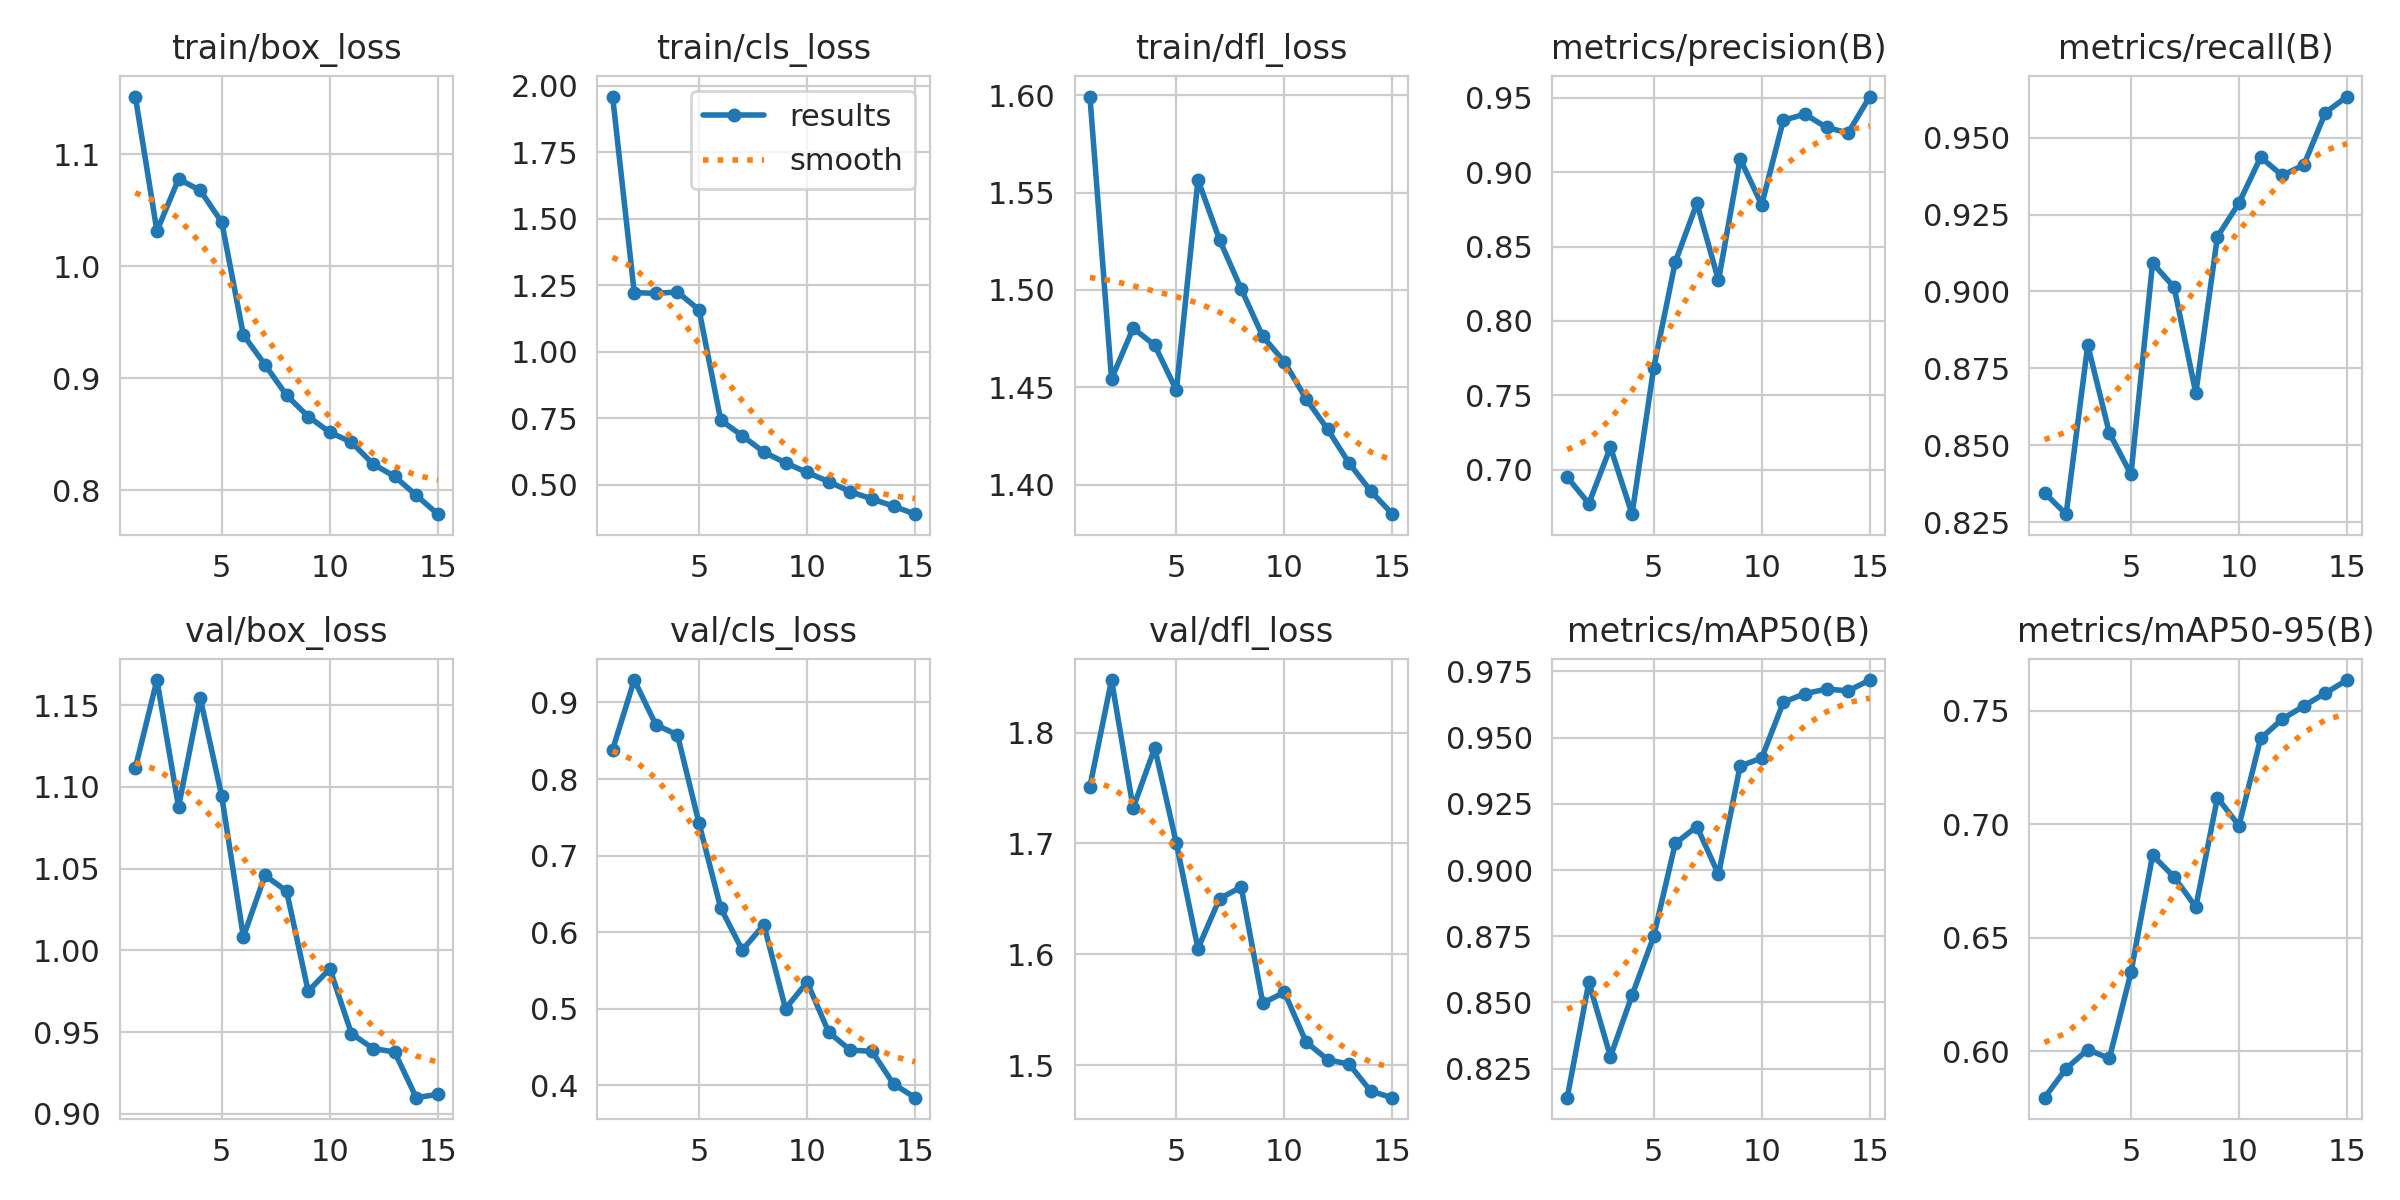

In [7]:
from IPython.display import Image, display
import os

# LƯU Ý: Kiểm tra lại đường dẫn thư mục kết quả của bạn
# Mặc định YOLOv8 sẽ lưu vào 'runs/detect/train'. 
# Nếu bạn chạy huấn luyện nhiều lần, nó có thể là 'train2', 'train3',...
# Bạn có thể nhìn vào cây thư mục bên trái để xác nhận tên folder.
result_dir = 'runs/detect/train' 

# 1. Hiển thị Ma trận nhầm lẫn (Confusion Matrix)
# File này cho biết mô hình đang dự đoán nhầm các lớp nào với nhau
conf_matrix_path = f'{result_dir}/confusion_matrix.png'
if os.path.exists(conf_matrix_path):
    print("Ma trận nhầm lẫn (Confusion Matrix):")
    display(Image(filename=conf_matrix_path))
else:
    print(f"Không tìm thấy file {conf_matrix_path}. Hãy kiểm tra lại đường dẫn.")

# 2. Hiển thị Biểu đồ quá trình huấn luyện (Training Curves)
# File này chứa các biểu đồ Loss (mất mát) và mAP (độ chính xác) qua các epoch
results_path = f'{result_dir}/results.png'
if os.path.exists(results_path):
    print("\nBiểu đồ kết quả huấn luyện (Loss & mAP):")
    display(Image(filename=results_path))
else:
    print(f"Không tìm thấy file {results_path}.")

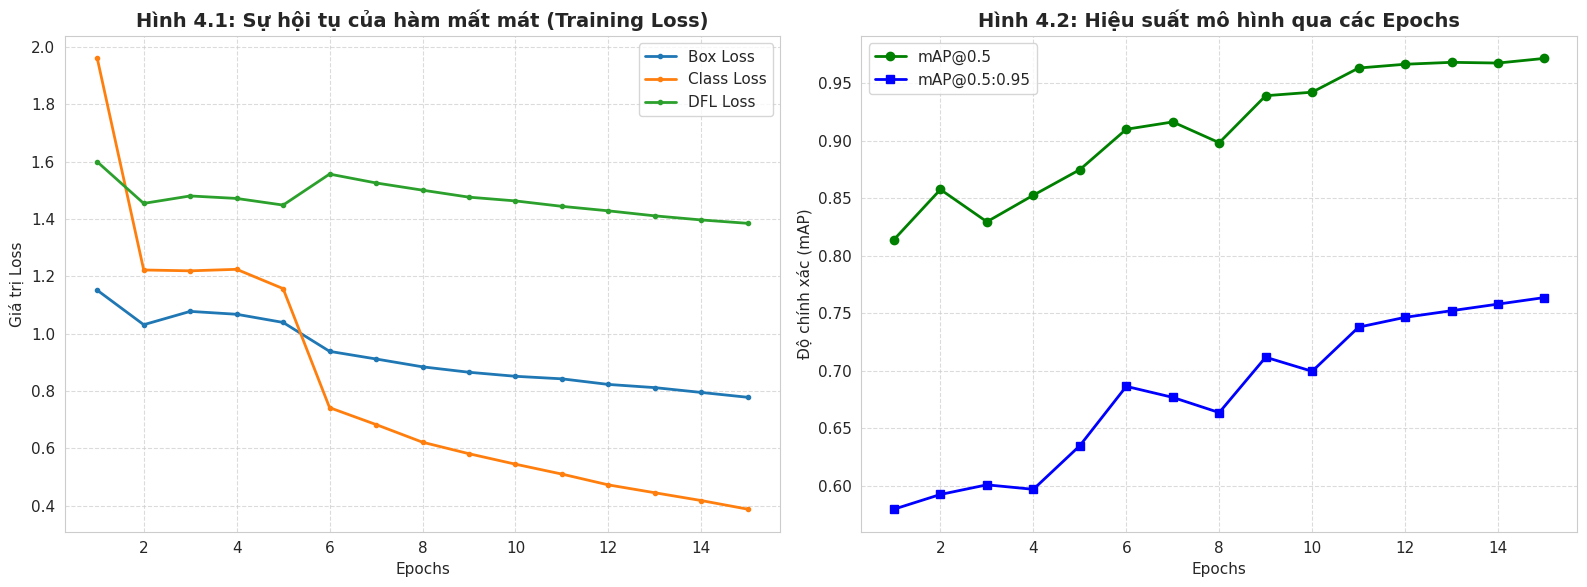

Đã lưu biểu đồ 'Hinh4_Bieu_do_Huan_luyen.png'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- CẤU HÌNH ĐƯỜNG DẪN ---
# Đường dẫn tới file kết quả training của bạn
RESULTS_CSV_PATH = '/kaggle/working/runs/detect/train/results.csv'

def plot_training_curves(csv_path):
    try:
        # 1. Đọc dữ liệu và chuẩn hóa tên cột
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        
        epochs = df['epoch']
        
        # Cấu hình font chữ và style
        plt.rcParams.update({'font.size': 11, 'font.family': 'sans-serif'})
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # 2. Biểu đồ 1: Hàm mất mát (Loss)
        ax1.plot(epochs, df['train/box_loss'], label='Box Loss', marker='.', linewidth=2)
        ax1.plot(epochs, df['train/cls_loss'], label='Class Loss', marker='.', linewidth=2)
        ax1.plot(epochs, df['train/dfl_loss'], label='DFL Loss', marker='.', linewidth=2)
        
        ax1.set_title('Hình 4.1: Sự hội tụ của hàm mất mát (Training Loss)', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Giá trị Loss')
        ax1.legend()
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # 3. Biểu đồ 2: Độ chính xác (mAP)
        ax2.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5', color='green', marker='o', linewidth=2)
        ax2.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='blue', marker='s', linewidth=2)
        
        ax2.set_title('Hình 4.2: Hiệu suất mô hình qua các Epochs', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Độ chính xác (mAP)')
        ax2.legend()
        ax2.grid(True, linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.savefig('Hinh4_Bieu_do_Huan_luyen.png', dpi=300)
        plt.show()
        print("Đã lưu biểu đồ 'Hinh4_Bieu_do_Huan_luyen.png'")
        
    except FileNotFoundError:
        print(f"Không tìm thấy file tại {csv_path}. Hãy chắc chắn bạn đã train xong!")

# Chạy hàm
plot_training_curves(RESULTS_CSV_PATH)

In [ ]:
# Đánh giá kết quả training
metrics = model.val()
print(metrics)


In [ ]:
# Sau khi train xong
model.save("/kaggle/working/driver_car_yolov11.pt")

In [ ]:
from ultralytics import YOLO

model_loaded = YOLO("/kaggle/working/driver_car_yolov11.pt")

img_path = "/kaggle/input/driver-car/datacar/test/images/0B5B4A0B-E106-46FE-906A-B5BA65A853CD_jpeg_jpg.rf.38430516dea1fcb6747faeef93fcc4da.jpg"  
results = model_loaded.predict(source=img_path, imgsz=640, conf=0.25)

import cv2
import matplotlib.pyplot as plt

res_img = results[0].plot()
plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

# --- CẤU HÌNH ---
MODEL_PATH = '/kaggle/working/runs/detect/train/weights/best.pt'
TEST_IMAGES_DIR = '/kaggle/input/driver-car/datacar/test/images'

def visualize_predictions(model_path, images_dir, num_samples=6):
    # 1. Load model
    if not os.path.exists(model_path):
        print("Chưa có file model best.pt!")
        return
    
    model = YOLO(model_path)
    
    # 2. Lấy danh sách ảnh test
    image_files = glob.glob(os.path.join(images_dir, "*.jpg"))
    if not image_files:
        print("Không tìm thấy ảnh test!")
        return
        
    # Chọn ngẫu nhiên một số ảnh
    samples = random.sample(image_files, min(len(image_files), num_samples))
    
    # 3. Vẽ lưới ảnh kết quả (2 dòng x 3 cột)
    plt.figure(figsize=(18, 10))
    
    for i, img_path in enumerate(samples):
        # Dự đoán
        results = model.predict(img_path, conf=0.4, verbose=False) # Ngưỡng tự tin 0.4
        
        # Lấy ảnh đã vẽ box
        res_plot = results[0].plot()
        
        # Chuyển màu từ BGR sang RGB để hiển thị đúng với Matplotlib
        res_rgb = cv2.cvtColor(res_plot, cv2.COLOR_BGR2RGB)
        
        plt.subplot(2, 3, i+1)
        plt.imshow(res_rgb)
        plt.axis('off')
        plt.title(f"Mẫu thử nghiệm {i+1}", fontsize=12)
    
    plt.suptitle("Hình 4.5: Kết quả nhận diện thực tế trên tập kiểm thử", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('Hinh4_5_Ket_qua_Du_doan.png', dpi=300)
    plt.show()
    print("Đã lưu ảnh demo 'Hinh4_5_Ket_qua_Du_doan.png'")

# Chạy hàm
visualize_predictions(MODEL_PATH, TEST_IMAGES_DIR)